In [ ]:
! git clone https://github.com/Nelson-Gon/unet.git

In [1]:
!pwd

/content


In [2]:
%cd unet

/content/unet


In [3]:
from unet.model import *
from unet.data import *
from unet.augmentation import *

Using TensorFlow backend.


In [5]:
!  ls examples/BBBC003_v1/

images	truth


In [4]:
data_generator_args =  dict(rotation_range=45,
                      rescale = 1./255,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [104]:
train_gen = validGenerator(5, "examples/BBBC003_v1/train","images", "truth",aug_dict = data_generator_args,
                                 seed = 3, target_size = (256, 256))

In [22]:
# need folders that are well arranged, won't work otherwise
#! mkdir examples/BBBC003_v1/train && mv examples/BBBC003_v1/images examples/BBBC003_v1/train/ && mv examples/BBBC003_v1/truth examples/BBBC003_v1/train/

In [105]:
valid_gen = validGenerator(5, "aug","images", "masks",aug_dict = data_generator_args,
                                 seed = 3, target_size = (256, 256))

In [31]:
model = unet(input_size = (256, 256, 1), metrics=['accuracy'], loss='binary_crossentropy', learning_rate=1e-3)

In [109]:
history = model.fit_generator(train_gen, steps_per_epoch=10,epochs=5, validation_data=valid_gen,validation_steps=5)

Epoch 1/5
Found 7665 images belonging to 1 classes.
Found 7665 images belonging to 1 classes.
10/10 [==============================] - 14s 1s/step - loss: 0.7621 - accuracy: 0.8954 - val_loss: 6.7216 - val_accuracy: 0.4112
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.5642 - accuracy: 0.9005 - val_loss: 11.3059 - val_accuracy: 0.2603
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.3360 - accuracy: 0.9140 - val_loss: 12.8409 - val_accuracy: 0.0909
Epoch 4/5
10/10 [==============================] - 13s 1s/step - loss: 0.2796 - accuracy: 0.9184 - val_loss: 10.3699 - val_accuracy: 0.2394
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.2542 - accuracy: 0.9203 - val_loss: 0.8778 - val_accuracy: 0.9124


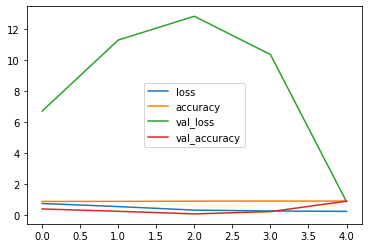

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

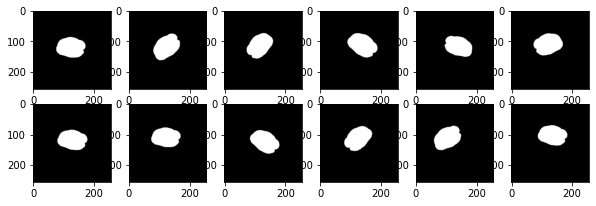

In [14]:
show_images("aug/masks", image_suffix="png", number = 12)

In [117]:
test_images = testGenerator("aug/images", 15, image_suffix="png")

In [114]:
model.save("unet_embryo.hdf5")

In [118]:
model = unet(pretrained_weights="unet_embryo.hdf5")

In [119]:
results = model.predict_generator(test_images, 15, verbose=1)

15/15 [==============================] - 3s 208ms/step


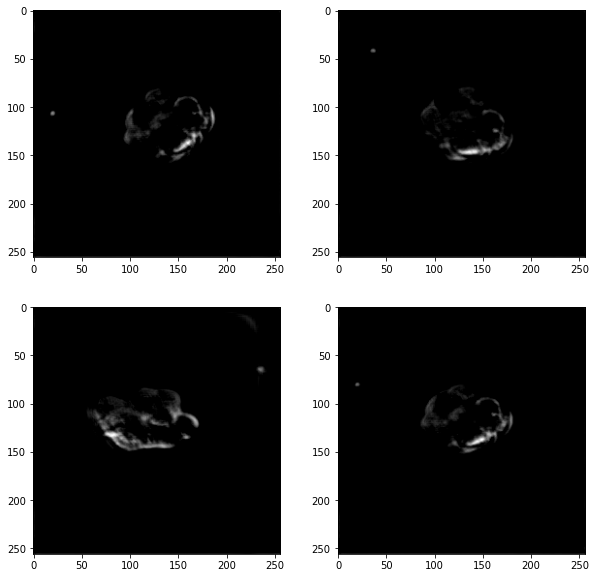

In [123]:
show_images(results)

In [125]:
!mkdir predictions

In [126]:
savePredictions("predictions", results, image_prefix="predicted_")

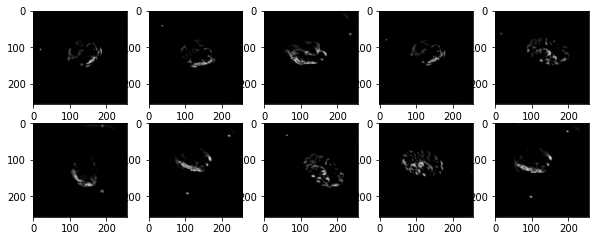

In [127]:
show_images("predictions", image_suffix="tif", number = 10)